# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading CSV files

In [2]:
ip_df = pd.read_csv('IPL_PLAYERS.csv')
tb_df = pd.read_csv('TOP_BUYS.csv')
un_df = pd.read_csv('UNSOLD_PLAYERS.csv')

# Data Exploration 

In [3]:
ip_df.head()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK


In [4]:
tb_df.head()

,TEAM,NATIONALITY,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"11,50,00,000"


In [5]:
un_df.head()

,PLAYER,NATIONALITY,TYPE,BASE PRICE
0,Priyansh Arya,Indian,Batter,2000000
1,Rohan Kunnummal,Indian,Batter,2000000
2,Manan Vohra,Indian,Batter,2000000
3,Raj Angad Bawa,Indian,All-Rounder,2000000
4,Sarfaraz Khan,Indian,All-Rounder,2000000


In [6]:
#Changing column name in Top Buy table
new_col = {"NATIONALITY":"PLAYER"}
tb_df = tb_df.rename(columns=new_col)
tb_df.head()

,TEAM,PLAYER,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"11,50,00,000"


# Data Cleaning

In [7]:
ip_df.isna().sum()

PLAYERS        0
NATIONALITY    0
TYPE           0
PRICE PAID     0
TEAM           0
dtype: int64

In [8]:
tb_df.isna().sum()

TEAM          0
PLAYER        0
TYPE          0
PRICE PAID    0
dtype: int64

In [9]:
un_df.isna().sum()

PLAYER         0
NATIONALITY    0
TYPE           0
BASE PRICE     0
dtype: int64

In [10]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYERS      72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   PRICE PAID   72 non-null     int64 
 4   TEAM         72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [11]:
tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM        10 non-null     object
 1   PLAYER      10 non-null     object
 2   TYPE        10 non-null     object
 3   PRICE PAID  10 non-null     object
dtypes: object(4)
memory usage: 452.0+ bytes


In [12]:
#Changing the data type of price paid to integer
tb_df['PRICE PAID'] = tb_df['PRICE PAID'].str.replace(',', '').astype('int64')
tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM        10 non-null     object
 1   PLAYER      10 non-null     object
 2   TYPE        10 non-null     object
 3   PRICE PAID  10 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [13]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER       260 non-null    object
 1   NATIONALITY  260 non-null    object
 2   TYPE         260 non-null    object
 3   BASE PRICE   260 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.3+ KB


## Which team spent the most?

In [14]:
value_spent = ip_df.groupby("TEAM")["PRICE PAID"].sum()
value_spent.sort_values(ascending = False)

TEAM
KKR    313500000
SH     308000000
CSK    304000000
GT     303000000
PK     249500000
RCB    204000000
DC     190500000
MI     167000000
RR     143000000
LSG    122000000
Name: PRICE PAID, dtype: int64

<Axes: title={'center': 'PRICE SPENT BY TEAMS'}, xlabel='TEAM', ylabel='Price spent'>

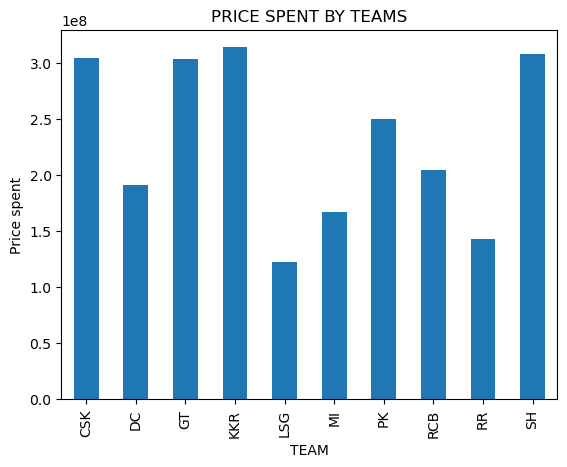

In [15]:
value_spent.plot(kind="bar",ylabel="Price spent",title="PRICE SPENT BY TEAMS")

## How many players from each type were sold?

In [16]:
wk_sold = ip_df.groupby("TYPE")["PLAYERS"].count()
wk_sold

TYPE
All-Rounder      25
Batter           13
Bowler           26
Wicket-Keeper     8
Name: PLAYERS, dtype: int64

<Axes: title={'center': 'Number of players in each type'}, xlabel='Type', ylabel='Number of players'>

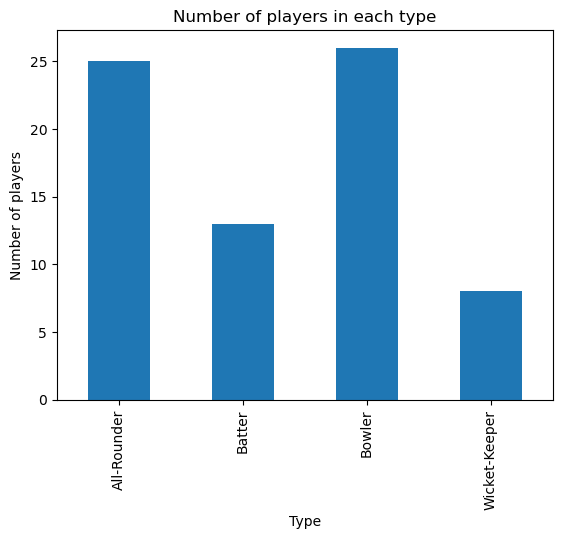

In [17]:
wk_sold.plot(kind="bar",xlabel="Type",ylabel="Number of players",title="Number of players in each type")

## Unsold players nationality count?

In [18]:
unsold_nat = un_df.groupby("NATIONALITY")["PLAYER"].count()
unsold_nat

NATIONALITY
Indian      174
Overseas     86
Name: PLAYER, dtype: int64

## Who got the highest amount?

In [19]:
tb_df

,TEAM,PLAYER,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000
3,Punjab Kings,Harshal Patel,All-Rounder,117500000
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,115000000
5,Gujarat Titans,Spencer Johnson,Bowler,100000000
6,Chennai Super Kings,Sameer Rizvi,Batter,84000000
7,Punjab Kings,Rilee Rossouw,Batter,80000000
8,Gujarat Titans,Shahrukh Khan,All-Rounder,74000000
9,Rajasthan Royals,Rovman Powell,Batter,74000000


<Axes: title={'center': 'TOP BUY'}, xlabel='PLAYER'>

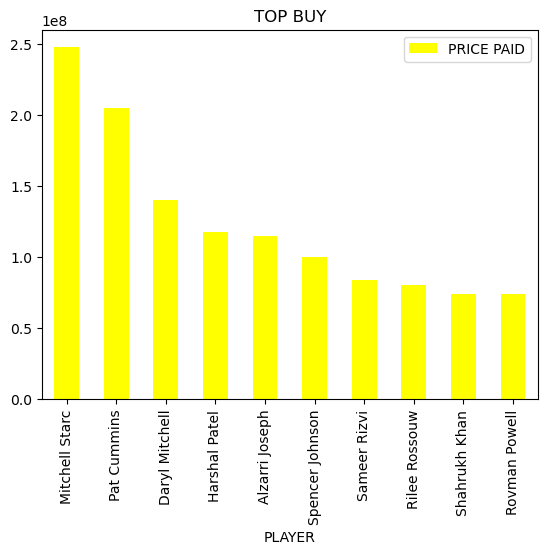

In [23]:
tb_df.plot(kind="bar",x="PLAYER",y="PRICE PAID",title="TOP BUY",color="yellow")